# Transfer Learning from MobileNet - Exercise
[IMAGENET 1000 Class List
](https://deeplearning.cms.waikato.ac.nz/user-guide/class-maps/IMAGENET/)

## Importing the libraries

In [33]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import keras
import matplotlib.pyplot as plt
from keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.applications.mobilenet import MobileNet
from keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.optimizers import Adam

## Imports The MobileNet Model
Imports the mobilenet model and **discards the last 1000 neuron layer**.

In [34]:
base_model=MobileNet(weights='imagenet',include_top=False) 

## Add layers of our own
We add dense layers so that the model can learn more complex functions and classify for better results. 

In [35]:
x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x)
x=Dense(1024,activation='relu')(x) 
x=Dense(512,activation='relu')(x) 
preds=Dense(1,activation='sigmoid')(x) 


*   Specify the inputs
*   Specify the outputs

Now a model has been created based on our architecture 🏆

In [36]:
model=Model(inputs=base_model.input,outputs=preds)

Layers & models also feature a boolean attribute `trainable`. Its value can be changed.
Setting `layer.trainable` to `False` moves all the layer's weights from trainable to
non-trainable.  This is called "freezing" the layer: the state of a frozen layer won't
be updated during training (either when training with `fit()` or when training with
 any custom loop that relies on `trainable_weights` to apply gradient updates).<br> 
 When a trainable weight becomes non-trainable, its value is no longer updated during
 training.

**Example: setting `trainable` to `False`**<br><br>
**Very Importent** : The setting of `trainable` are **Recursive** <br>
If you set `trainable = False` on a model or on any layer that has sublayers,
all children layers become non-trainable as well.


In [37]:
for layer in model.layers[:-4]:
    layer.trainable=False

## Data Preprocessing


### Download the dataset

In [38]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
x_train.shape == (50000, 32, 32, 3)
x_test.shape == (10000, 32, 32, 3)
y_train.shape == (50000, 1)
y_test.shape == (10000, 1)

True

Selected idexes for two classes (aircraft = 0, ship = 8)

In [39]:
index_train = np.where((y_train == 0) | (y_train == 8))
index_test = np.where((y_test == 0) | (y_test == 8))

We will extract the two desired classes by their indexes



In [40]:
x_train = x_train[index_train[0],:]
y_train = y_train[index_train[0]]
x_test = x_test[index_test[0],:]
y_test = y_test[index_test[0]]

Change all labels from 8 to 1 (aircraft = 0, ship = 1)

In [41]:
y_train[y_train == 8] = 1
y_test[y_test == 8] = 1

The current shape of the data set:



x_train: (10000, 32, 32, 3)
y_train: (10000, 1)
x_test: (2000, 32, 32, 3)
y_testn: (2000, 1)


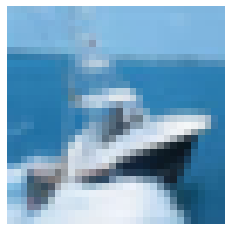

1

In [42]:
print(f'x_train: {x_train.shape}\ny_train: {y_train.shape}\nx_test: {x_test.shape}\ny_testn: {y_test.shape}')
plt.imshow(x_train[0], cmap = plt.cm.binary)
plt.axis("off")
plt.show()
y_train[0][0]

### Data Generator

Because the original image size is (32,32,3) so we need to adjust the size to (224,224,3)

In [43]:
def change_to_224X224(images):
  return tf.image.resize(
    images=images,
    size=(224,224),
    preserve_aspect_ratio=False,
    antialias=False,
    name=None
)

In [44]:
train_datagen=ImageDataGenerator(preprocessing_function=preprocess_input) #included in our dependencies

train_generator=train_datagen.flow(x=change_to_224X224(x_train), y=y_train, batch_size = 32)

In [45]:
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input) 
test_set = test_datagen.flow(x=change_to_224X224(x_test), y=y_test, batch_size = 32)

## Compiling the NN

In [46]:
model.compile(optimizer='Adam',loss='binary_crossentropy',metrics=['accuracy'])

## Training

In [47]:
step_size_train=train_generator.n//train_generator.batch_size
history = model.fit_generator(generator=train_generator, validation_data = test_set, steps_per_epoch=step_size_train, epochs=10)

Epoch 1/10


<ipython-input-47-e983888a9b6a>:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_generator, validation_data = test_set, steps_per_epoch=step_size_train, epochs=10)


312/312 [==============================] - 15s 44ms/step - loss: 0.1934 - accuracy: 0.9230 - val_loss: 0.1204 - val_accuracy: 0.9525
Epoch 2/10
312/312 [==============================] - 13s 42ms/step - loss: 0.1020 - accuracy: 0.9634 - val_loss: 0.1491 - val_accuracy: 0.9465
Epoch 3/10
312/312 [==============================] - 13s 42ms/step - loss: 0.0797 - accuracy: 0.9717 - val_loss: 0.1153 - val_accuracy: 0.9560
Epoch 4/10
312/312 [==============================] - 13s 42ms/step - loss: 0.0685 - accuracy: 0.9746 - val_loss: 0.0910 - val_accuracy: 0.9615
Epoch 5/10
312/312 [==============================] - 13s 42ms/step - loss: 0.0554 - accuracy: 0.9795 - val_loss: 0.1309 - val_accuracy: 0.9515
Epoch 6/10
312/312 [==============================] - 13s 42ms/step - loss: 0.0486 - accuracy: 0.9826 - val_loss: 0.1155 - val_accuracy: 0.9590
Epoch 7/10
312/312 [==============================] - 13s 43ms/step - loss: 0.0452 - accuracy: 0.9826 - val_loss: 0.0920 - val_accuracy: 0.9660
Epo

In [48]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, None, None, 32)   128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, None, None, 32)   288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, None, None, 32)   128       
 ation)                                                    

## Visualization of the Loss


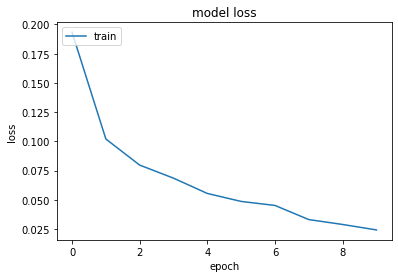

In [57]:
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

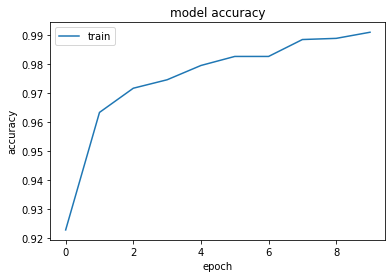

In [58]:
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

## Train's loss and accuracy

In [59]:
for key, val in history.history.items(): 
  print(f'{key} : {round(val[-1], 2)}')

loss : 0.02
accuracy : 0.99
val_loss : 0.15
val_accuracy : 0.96


## Let's see how MobileNet works without our model

In [52]:
mobile = keras.applications.mobilenet.MobileNet()

In [53]:
import cv2
from keras.applications.mobilenet import preprocess_input
from keras.applications import imagenet_utils
def prepare_image():
    img = cv2.resize(x_test[0], dsize=(224, 224), interpolation=cv2.INTER_CUBIC)
    img_array = keras.utils.img_to_array(img)
    img_array_expanded_dims = np.expand_dims(img_array, axis=0)
    plt.imshow(img)
    return preprocess_input(img_array_expanded_dims)

1/1 [==============================] - 0s 353ms/step


[[('n04273569', 'speedboat', 0.4519848),
  ('n03942813', 'ping-pong_ball', 0.0952355),
  ('n02951358', 'canoe', 0.03381915),
  ('n03400231', 'frying_pan', 0.026778534),
  ('n03584829', 'iron', 0.026041957)]]

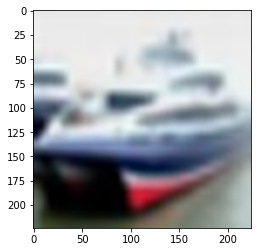

In [54]:
preprocessed_image = prepare_image()
predictions = mobile.predict(preprocessed_image)
results = imagenet_utils.decode_predictions(predictions)
results